# 3. Anonymising synthetic personal data prior to publication

<div class="alert alert-block alert-warning">
    <b>Learning outcomes:</b>
    <br>
    <ul>
        <li>Acknowledge the privacy and confidentiality issues in data storage and security of personal data.</li>
        <li>Recognise responsibilities and mechanisms for securing data-at-rest and data-in-motion.</li>
        <li>Employ methods for anonymising data, including geospatial jitter, address and name redaction, and field obfuscation.</li>
        <li>Investigate and apply appropriate aggregation techniques to anonymise personal data that is otherwise immune to field redaction approaches.</li>
    </ul>
</div>

---

## 3.1 Ethics and the risks of deanonymisation in personal data

When we release data we take on a great responsibility. Not only will people use these data to conduct research, build commercial applications or even make life-changing decisions about where to live, work or study, but some people - adversaries - will try to use these data to do harm.

<div class="alert alert-block alert-danger">
    <p><b>Data anonymisation</b> is the set of techniques which acts to irreversibly alter personal data through encryption, redaction or 
        aggregation so that a data subject can no longer be identified directly or indirectly from a dataset. To support the integrity of 
        research and analysis, anonymization must preserve the semantics of the original data to ensure 
        entity resolution - the internal relationships between data - are still realisable.</p>
    <p><b>The complexity of managing these risks cannot be understated.</b> This lesson can only be an overview of the 
        techniques and skills required. Please take guidance from professionals and recognise that this course is only an overview.</p>
</div>

### Metadata and American revolutionary politics of 1772

We have spent a great deal of this course learning how to produce and present metadata; information about information. Data, no matter how poorly structured, can be understood with appropriate metadata. Data, no matter how well structured, cannot be understood without it.

Metadata are critical to understanding the meaning behind data and, in and of itself, is highly suggestive.

As illustration, consider [Paul Revere](https://en.wikipedia.org/wiki/Paul_Revere), the American revolutionary hero of their war of independence against the British. That war, which ran [from 1775 to 1783](https://en.wikipedia.org/wiki/American_Revolutionary_War) pitched colonial settlers against the British Empire.

Kieran Healy, a professor of Sociology at Duke University, imagined what would happen if the British spymasters of the time had access to [social network analysis](https://en.wikipedia.org/wiki/Social_network_analysis) tools of the present. In ["Using Metadata to find Paul Revere"](https://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/) he demonstrates how metadata alone can reveal Paul Revere's centrality and importance to the revolutionary efforts of the nascent uprising.

In 1772, the British were struggling to deal with rebellion and an emerging popular uprising. Leaders of various independence cells were arrested, but they had no sense of how these rebellions were organised. Using [data simply stating which organisation various people belong to](https://github.com/kjhealy/revere) - without knowing anything about these people or their beliefs - Healy goes from a table (of which this is an extract):

                               StAndrewsLodge LoyalNine NorthCaucus LongRoomClub TeaParty Bostoncommittee LondonEnemies 
    Adams.John                      0         0           1            1        0               0             0
    Adams.Samuel                    0         0           1            1        0               1             1
    Allen.Dr                        0         0           1            0        0               0             0
    Appleton.Nathaniel              0         0           1            0        0               1             0
    Ash.Gilbert                     1         0           0            0        0               0             0
    Austin.Benjamin                 0         0           0            0        0               0             1
    Austin.Samuel                   0         0           0            0        0               0             1
    Avery.John                      0         1           0            0        0               0             1
    Baldwin.Cyrus                   0         0           0            0        0               0             1
    Ballard.John                    0         0           1            0        0               0             0

To eventually building up a complete network of social interactions between various people:

![Revolutionary social network](images/revere-network-reduced.png)

That may not mean much to you, but you can see different clusters, or organisations, of people linked by individuals who span these clusters. One such link is seen here:

![Paul Revere](images/revere-closeup.png)

A government arresting various people at the centre of each of the major clusters may want to discover who may be uniting these disparate groups. Are there hidden organisers? Such a network map - offering no other information than who knows who - is incredibly powerful.

British analysts didn't know these techniques, simple as they are, in 1772, and the rest is history.

### Assessing risk from data publication

Network and statistical analysis are central to all research, from epidemiology, to healthcare, education, environmental science, physics and engineering. It's also at the heart of advertising recommendation engines used online.

Some of these uses are profoundly beneficial - such as, identifying symptoms specifically indicative of desease - and some are terrifyingly abusive - identifying people by their religious beliefs or personal characteristics.

Singapore's Personal Data Protection Commission [describe the following disclosure risks](https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF-Files/Other-Guides/Guide-to-Anonymisation_v1-(250118).pdf):

- __Identity disclosure (re-identification)__: permitting the identity of an individual described by a specific record. This could arise 
  from scenarios such as insufficient anonymisation, re-identification by linking, or pseudonym reversal.
- __Attribute  disclosure__: determining that an attribute described in the dataset belongs to a specific individual, even if the 
  individual’s record cannot be distinguished.
- __Inference disclosure__: making an inference about an individual even if they are not in the dataset, by statistical properties of the 
  dataset.
  
A typical example of such a risk is in the release of medical history. e.g. a dataset containing anonymised patient records of a surgeon reveals that all his patients below the age of 30 have undergone a particular procedure. If it is known that a specific individual is 28 years old and is a client of this surgeon, we then know that this individual has undergone the particular procedure, even if the individual's record cannot be distinguished from others in the anonymised dataset.

The risk is not only from one dataset, but from the way in which multiple datasets can be recombined.

### Risks from data-at-rest and data-in-motion

Data are not always in use. It can consist of research data in spreadsheets on unused storage media, or being emailed between people, or open on someone's computer. These various moments each constitute a different type of risk to accidental disclosure or inadvertant exposure.

- __Data-at-rest__: inactive data stored digitally or physically in any format, whether on paper in files, or in databases or spreadsheets 
  on hard-drives, phones or other forms of storage.
- __Data-in-motion__: active data either in transit between users, or in use in applications.

Data are at risk not just from physical attackers - adversaries - but also from accidental destruction (fires, floods, erasure, etc.). If you are collaborating to ensure anonymisation of a dataset, you need to protect that data from accidental disclosure by emailing it to colleagues in various states of processing. Email is inherently insecure.

The process of securing data protection are not only about the end-result, but also about all the intermediate steps. Data must be kept secure not just in its final state, but also through the its use, transit and storage.

You can take all the care in the world prior to publication, and then leave your source data on a flash-drive on a bus or expose sensitive information while working on your notebook computer in a public place.

As we strive to protect data subjects we should always ensure that first we do no harm.

---

## 3.2 Methods for data anonymisation: redaction

There are a wide range of techniques available to support anonymisation. Broadly, though, they fit into two types:

- __Redaction__: in which we remove fields or line-item information while maintaining sufficient integrity to permit semantic analysis;
- __Aggregation__: in which we deliberately aggregate data to ensure outlier anonymity;

We will use a single dataset for this lesson, produced by [Synthea](https://github.com/synthetichealth/synthea), an open-source project which allows the creation of synthetic data. Such data are produced via randomness algorithms to generate pseudo-information useful for testing analytical and anonymisation systems:

> Jason Walonoski, Mark Kramer, Joseph Nichols, Andre Quina, Chris Moesel, Dylan Hall, Carlton Duffett, Kudakwashe Dube, Thomas Gallagher, Scott McLachlan, Synthea: An approach, method, and software mechanism for generating synthetic patients and the synthetic electronic health care record, Journal of the American Medical Informatics Association, Volume 25, Issue 3, March 2018, Pages 230–238, https://doi.org/10.1093/jamia/ocx079

Since we will also do some geospatial anonymisation, you'll need to install a new Python package, [`geopandas`](https://geopandas.org/index.html):

    pip install geopandas
    
Once you've done that, let's load the lesson dataset and inspect it:

In [1]:
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as plt

df = pd.read_csv("data/lesson-programmatic/patient-data-anonymisation-exercise.csv")
df.head()

PATIENT_ID                 START  \
0  034e9e3b-2def-4559-bb2a-7850888ae060  2010-01-23T17:45:28Z   
1  034e9e3b-2def-4559-bb2a-7850888ae060  2012-01-23T17:45:28Z   
2  034e9e3b-2def-4559-bb2a-7850888ae060  2015-01-26T17:45:28Z   
3  034e9e3b-2def-4559-bb2a-7850888ae060  2016-12-29T17:45:28Z   
4  034e9e3b-2def-4559-bb2a-7850888ae060  2017-01-09T17:45:28Z   

                   STOP ENCOUNTERCLASS  \
0  2010-01-23T18:10:28Z     ambulatory   
1  2012-01-23T18:00:28Z       wellness   
2  2015-01-26T18:15:28Z       wellness   
3  2016-12-29T18:00:28Z     ambulatory   
4  2017-01-09T18:00:28Z     outpatient   

                                  DESCRIPTION  TOTAL_CLAIM_COST  \
0                       Encounter for symptom            129.16   
1  General examination of patient (procedure)            129.16   
2  General examination of patient (procedure)            129.16   
3                       Encounter for symptom            129.16   
4          Encounter for check up (procedure)            129.16   

   PAYER_COVERAGE            REASONDESCRIPTION   BIRTHDATE DEATHDATE  ...  \
0           54.16  Acute bronchitis (disorder)  14/11/1983       NaN  ...   
1          129.16                          NaN  14/11/1983       NaN  ...   
2          129.16                          NaN  14/11/1983       NaN  ...   
3           54.16  Acute bronchitis (disorder)  14/11/1983       NaN  ...   
4           54.16                          NaN  14/11/1983       NaN  ...   

     ETHNICITY GENDER                  BIRTHPLACE                   ADDRESS  \
0  nonhispanic      M  Danvers  Massachusetts  US  422 Farrell Path Unit 69   
1  nonhispanic      M  Danvers  Massachusetts  US  422 Farrell Path Unit 69   
2  nonhispanic      M  Danvers  Massachusetts  US  422 Farrell Path Unit 69   
3  nonhispanic      M  Danvers  Massachusetts  US  422 Farrell Path Unit 69   
4  nonhispanic      M  Danvers  Massachusetts  US  422 Farrell Path Unit 69   

         CITY          STATE            COUNTY     ZIP        LAT        LON  
0  Somerville  Massachusetts  Middlesex County  2143.0  42.360697 -71.126531  
1  Somerville  Massachusetts  Middlesex County  2143.0  42.360697 -71.126531  
2  Somerville  Massachusetts  Middlesex County  2143.0  42.360697 -71.126531  
3  Somerville  Massachusetts  Middlesex County  2143.0  42.360697 -71.126531  
4  Somerville  Massachusetts  Middlesex County  2143.0  42.360697 -71.126531  

[5 rows x 28 columns]

__These are synthetic data__. Nothing here is real, but imagine it was. These data reveal not only the name of each patient and their medical history, but also their address, driver's licence, passport numbers, race and the latitude and longitude of their address.

Anyone conducting clinical research needs these data, but not all of it. How much of it can be redacted without compromising its research value?

If we removed all the names and addresses, we could certainly protect individuals but at the expense of understanding disease progression.

Consider the patient history of _Carmelia Konopelski_:

In [2]:
df[df["PATIENT_ID"] == "71ba0469-f0cc-4177-ac70-ea07cb01c8b8"]

PATIENT_ID                 START  \
703  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2002-01-15T20:46:46Z   
704  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2002-01-25T20:46:46Z   
705  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2002-11-28T20:46:46Z   
706  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2003-04-29T20:46:46Z   
707  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2003-05-11T20:46:46Z   
..                                    ...                   ...   
783  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2012-05-08T20:46:46Z   
784  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2012-05-08T20:46:46Z   
785  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2012-05-08T20:46:46Z   
786  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2012-08-14T20:46:46Z   
787  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  2012-11-20T20:46:46Z   

                     STOP ENCOUNTERCLASS  \
703  2002-01-15T21:01:46Z     ambulatory   
704  2002-01-25T21:37:46Z     ambulatory   
705  2002-12-12T20:46:46Z     ambulatory   
706  2003-04-29T21:01:46Z       wellness   
707  2003-05-11T21:01:46Z     ambulatory   
..                    ...            ...   
783  2012-05-08T21:01:46Z     ambulatory   
784  2012-05-09T21:07:46Z      inpatient   
785  2012-05-09T21:16:46Z      inpatient   
786  2012-08-14T21:01:46Z     ambulatory   
787  2012-11-20T21:01:46Z     ambulatory   

                                   DESCRIPTION  TOTAL_CLAIM_COST  \
703                      Encounter for problem            129.16   
704                      Encounter for problem            129.16   
705                      Encounter for symptom            129.16   
706               Well child visit (procedure)            129.16   
707                      Encounter for symptom            129.16   
..                                         ...               ...   
783  Postoperative follow-up visit (procedure)            129.16   
784    Screening surveillance (regime/therapy)            129.16   
785       Gynecology service (qualifier value)            129.16   
786  Postoperative follow-up visit (procedure)            129.16   
787  Postoperative follow-up visit (procedure)            129.16   

     PAYER_COVERAGE                                  REASONDESCRIPTION  \
703           54.16                                                NaN   
704           54.16                                                NaN   
705           54.16  Perennial allergic rhinitis with seasonal vari...   
706           54.16                                                NaN   
707           54.16               Streptococcal sore throat (disorder)   
..              ...                                                ...   
783           54.16            Malignant neoplasm of breast (disorder)   
784           54.16            Malignant neoplasm of breast (disorder)   
785           54.16            Malignant neoplasm of breast (disorder)   
786           54.16            Malignant neoplasm of breast (disorder)   
787           54.16            Malignant neoplasm of breast (disorder)   

      BIRTHDATE   DEATHDATE  ...    ETHNICITY GENDER              BIRTHPLACE  \
703  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
704  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
705  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
706  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
707  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
..          ...         ...  ...          ...    ...                     ...   
783  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
784  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
785  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
786  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   
787  21/11/2000  21/11/2012  ...  nonhispanic      F  Lee  Massachusetts  US   

                 ADDRESS     C

These data describe ten years of her life, from her birth in 2002, to her death from cancer in 2012. The progression of her illness is critical for research, but her personal details are not.

### 3.2.1 Redaction strategy

Before we start doing anything, we need to understand our dataset, and understand how we intend to redact it _while maintaining its internal integrity so that we can continue to conduct analysis_.

Consider if these data contained information on all patients in a particular region, but children living near a specific factory had an increased risk of dying from childhood cancer, we would definitely want to know where those children lived.

- Ensure that individual patient data cannot be recovered;
- Ensure that geospatial characteristics associated with patient morbidity and mortality are maintained;
- Consider the risk of outlier anonymity;
- Test methods for deanonymisation to ensure anonymised data cannot be reconstituted.

This means we can remove data like names, but we need a method for connecting data associated with each patient. We can remove addresses, but need a method to ensure a geographic relationship is maintained. 

Note, again, this is only an overview so we can only touch on these topics lightly.

#### 3.2.2 Redaction methods

#### Attribute suppression

An `attribute` is also known as a `field`. This method requires that we delete an entire field. It is one of the first, and easiest, steps we can take.

- Remove data we do not need
- Remove data we cannot easily redact

This is a destructive step since suppression deletes the original data.

#### Record suppression

Some data are outliers; sufficiently rare that - in and of itself - these data can't be anonymised. With record suppression we remove all data related to these individuals. However, tread carefully.

Outliers may be of significant interest if their status is part of the study. If a person's illness is unusual for the area where they live, for their ethnicity, gender or sexual orientation, then that would make them an outlier. However, that would also be important for understanding the disease.

On the other hand, if their location, ethnicity, gender or sexual orientation have no bearing on the disease, then these could be safely redacted.

How can we know which this is?

The method of analysing outliers is called [k-anonymity](https://en.wikipedia.org/wiki/K-anonymity) and is beyond the scope of this course. However, there are a series of techniques (listed in the `References`) which permit the analysis of data to assess the presence of outliers and the risk of deanonymisation.

#### Pseudonymisation

Pseudonymisation is the replacement of identifying data with randomised values. This can be reversable, if you create a key between the data and the generated values, but irreversable if you deliberately throw aways the keys. Persistent pseudonyms support linkage between the same individual across different datasets.

- `strings`: pseudonymise through replacement;

Our dataset already contains a pseudonymous field, `PATIENT_ID`, but the problem is that this is a reversable record. It does, absolutely, connect confidential patient information to these records. We can generate genuinely anonymous keys to further suppress the data.

#### Generalisation

Generalisation is a deliberate reduction in the precision of data, such as converting a person's age into a range, or a precise location into a less precise location.

- `range`: conversion of precise numbers into quantiles or statistical ranges;
- `cluster`: aggregation of geospatial data into statistically less significant clusters - this can also be used to mask outliers;

Design the data ranges with appropriate sizes. Sometimes quantiles are the most appropriate, sometimes we use statistical definitions (such as geospatial ranges that are designed to include sufficient numbers of people so as to reduce deanonymisation).

#### Shuffling

Shuffling is where data are rearranged such that the individual attribute values are still represented in the dataset, but generally, do not correspond to the original records. This is not appropriate for all data. Swapping diseases amongst different patients will certainly render the data anonymous, but will also confuse any epidemiological analysis.

#### Data Perturbation

Perturbation involves adding random noise to data to "blur" it. This can include rounding, shifting dates, or adding geospatial displacement (jitter) to coordinate data.  This means artificially moving the precision within a small range to obscure the exact details of the person.

- `dates`: shift exact dates by days or months;
- `rounding`: round off to the nearest decile or whole number, depending on the precision of the data;
- `coordinates`: perturb the data through geospatial displacement (jitter);

Care must be taken not to add too little or too much perturbation.

---

### 3.2.3 Redaction process

Each of these steps permits us to continue maintaining the relationship within the record, and to the place where these patients recorded their disease progression, while also ensuring patient confidentiality is maintained.

Here's the list of all the `fields` in the data. Start to think about which are candidates for each method:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

Lets also fire up `geopandas` and have a look at the physical location of our data:

In [4]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))

A few things to explain:

- `"EPSG:4326"` is the coordinate system used to plot the latitude and longitudes. Maps present a whole world of pain related to the 
  specific coordinate system used in presenting the data. This is beyond the scope of this course.
- `geometry=` is creating a `Point` reference in the coordinate plain which we are going to plot.

Now, unfortunately, to plot these data, you'll need to reproject these coordinates onto the web Mercator projection (`EPSG:3857`). This is not difficult, but is slow. The next step may take some time on your computer:

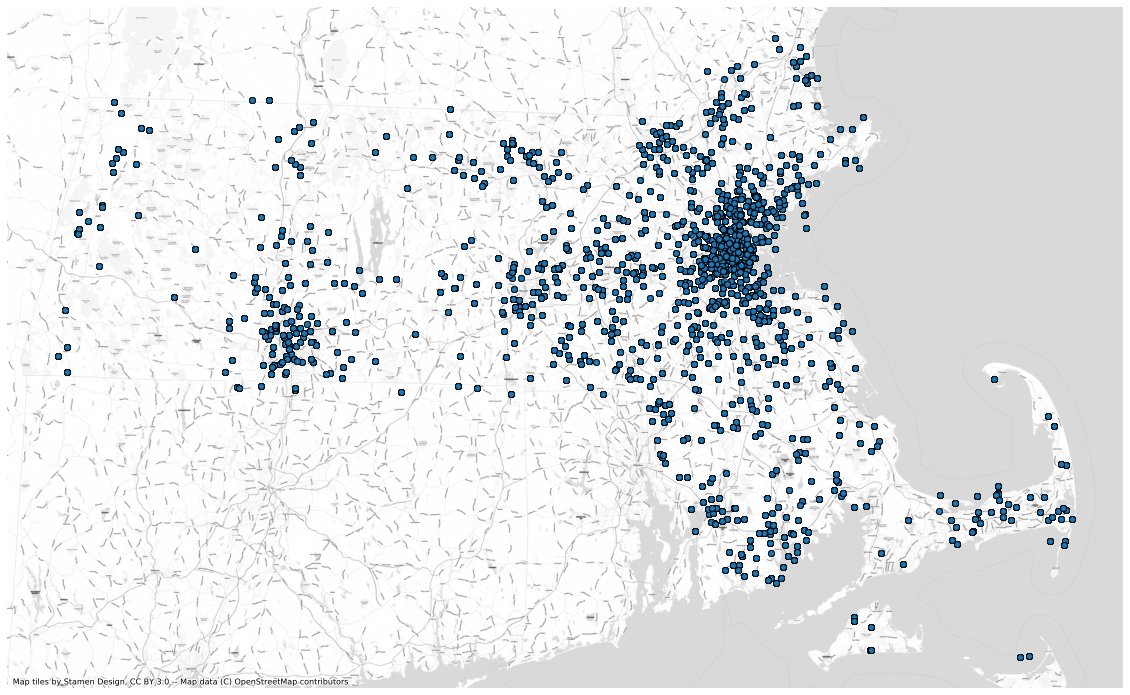

In [5]:
import contextily as ctx

# reproject
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

Let's start redacting and consider the data listed. These fields are obvious candidates for `suppression`:

    SSN, DRIVERS, PASSPORT, FIRST, LAST, MAIDEN, ADDRESS, ZIP

In [6]:
# Specify columns for removal
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# And drop them
df.drop(suppression, axis=1, inplace=True)

This happens to be Massachusetts in the US, and you can see how our data cluster.

We're going to write a Python `class` to run as we anonymise our data. First, though, a demonstration of two techniques.

- `UUID`: generates a random, unique identity code;

In [7]:
import uuid

str(uuid.uuid4())

'7ebeaa7d-3565-416e-aa60-15711c99df31'

- `Gaussian distributions`: random selection from a [normal (Gaussian) distribution](http://en.wikipedia.org/wiki/Normal_distribution)

In [8]:
import numpy as np

sigma = 0.001 # standard deviation, i.e. the degree of variation from the original data we allow
mu = 1 # the original data, considered the `mean`

np.random.normal(mu, sigma)

1.0000884793223845

These two mechanisms will permit us to create a pseudonymised version of our data:

In [9]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialise a defaultdict, this creates a default dictionary item if it doesn't exist
        # We use this to ensure we maintain data integrity while still randomising
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # we want a deviation from the true point
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        """
        For each unique identity produce a unique UUID, and a Gaussian randomised `LAT` and `LON`.

        Paramaters
        ----------
        identities: list of strings

        Returns
        -------
        dict
            Each dict entry contains a record containing a "uuid" and modifier for "lat" and "lon"
        """
        for _id in identities:
            self.pp[_id]
        return self.pp
    
    def redact(self, row):
        """
        For a given row in a dataframe, return the pseudonymised version of "PATIENT_ID", "LAT", "LON".
        
        Parameters:
        row: DataFrame row
        
        Returns:
        DataFrame slice of row
        """
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

Lets run that same `geopandas` visualisation:

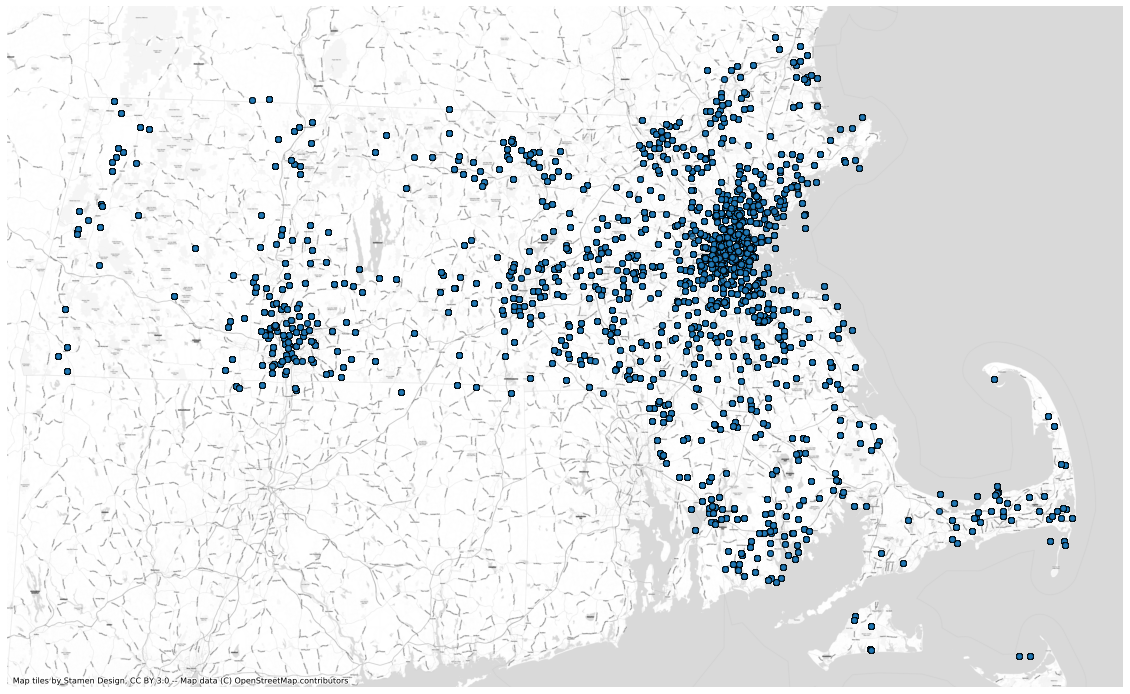

In [10]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

You can see that the data more-or-less looks the same. If you're worried that this isn't sufficiently obscured, you can decrease the `sigma` value to increase the scale of the jitter.

I will leave the `BIRTHDATE` and `DEATHDATE` anonymisation to you as an exercise. You can choose either of `generalisation` or `perturbation` for redaction.

## 3.3 Methods for data anonymisation: aggregation

Latanya Sweeney, Director of the Data Privacy Lab in the Institute of Quantitative Social Science (IQSS) at Harvard, proved that [87% of the US population can be re-identified using zip code, gender, and date of birth](https://dataprivacylab.org/projects/identifiability/paper1.pdf). Our standard redaction techniques may not have reduced the risk for our study participants as much as we hoped.

Aggregation is far more destructive than is redaction. We will lose resolution on patient morphology, and we will lose the direct relationships between data in exchange for summaries of that data. But we will gain security for the individuals concerned.

### 3.3.1 Differential privacy and assessing measures of risk

The problem with aggregation is that there are few generalised methods which can guide you as to how to create one. Each are specific to the data under consideration, and the range of research questions you want to support. There are mechanisms to test for anonymity, but not to support strategy.

[Differential privacy](https://en.wikipedia.org/wiki/Differential_privacy) is an advanced topic, and is a system for publicly sharing information about a dataset by describing the patterns of groups within the dataset while withholding information about individuals in the dataset.

A simple example is where we query our database to ask for a specific patient record and then ask for that person's gender according to the following procedure:

- Toss a coin.
- If heads, then toss the coin again (ignoring the outcome), and answer the question honestly.
- If tails, then toss the coin again and answer "Male" if heads, "Female" if tails.

The seemingly redundant extra toss in the first case is needed in situations where just the act of tossing a coin may be observed by others, even if the actual result stays hidden. The confidentiality then arises from the refutability of the individual responses.

This approach can ensure individual confidentiality simply because the person doing the query can never be certain if they received a correct response or not. Statistically, though, the aggregate result would be the same ratio as in the original data.

K-anonymity (and similar approaches to it like L-diversity and T-closeness) are not aggregation techniques but are measures used to test whether a risk threshold has been exceeded.

### 3.3.2 Aggregation strategy

Where redaction is guided by the data almost exclusively, aggregation is guided by the research objectives for the data. Any form of aggregation will limit what can be done and awareness of these limitations is critical.

Census data are usually aggregated in this way, with the individual microdata (responses from each household) only made available to accredited researchers, while the aggregated versions are made available to the public.

Our objective will be to create groups of data and then perform aggregations on each group. The range of aggregations we can form include:

- `count`: count of the individual members of the group;
- `totals`: sums of values, and sums of sub-groups within the values (e.g. total duration of illness, and duration of each type of illness);
- `averages`: including `mean`, `median` and `mode` of data sequences;
- `distributions`: including `quantiles`, `normals` or other types of distribution.

The groups can be by specific `categories` or `geospatial` ranges.

In many ways, an entire course of statistics is required to perform aggregations well.

<div class="alert alert-block alert-warning">
    <p><b>Aggregations require familiarity and experience with the data being aggregated.</b> It's very difficult to simply pick up a random dataset and know how to aggregate it
        in a way that supports analysis and extracts meaning from it. You are unlikely to be responsible for aggregating data you don't have experience with, and when you have that
        experience, knowing how to aggregate it will become clearer.</p>
</div>

#### 3.3.3 Aggregation process

Given all this, what follows is a very basic worked aggregation example using `pandas`. Aggregation requires a purpose, that purposes is defined by _a research question we need to answer_.

Let's create one:

<div class="alert alert-block alert-info">
    <p>For deceased patients, summarise the range of ages, specific illnesses, and total and median cost of treatment.</p>
</div>

We'll start by creating a new `DEATHAGE` column and then getting a distribution of that field:

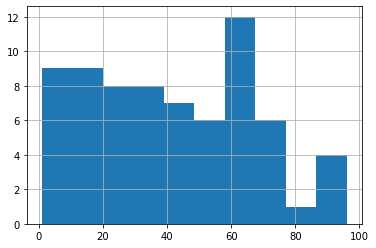

In [53]:
df = dfo.copy()
# Convert the date fields to pandas dates
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    df[c] = df[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filter for the final medical treatment for all deceased patients
df = df[df.STOP==df.DEATHDATE]
df.sort_values(by="STOP", inplace=True)
df.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Create the DEATHAGE 
# This is a VERY approximate age at death calculation
df["DEATHAGE"] = df.DEATHDATE.apply(lambda x: x.year) - df.BIRTHDATE.apply(lambda x: x.year)
# And draw the DEATHAGE distribution, divided into n bins
df["DEATHAGE"].hist(bins=10)

The next part will be left as an exercise for you. Your objective is to create a table with the following fields:

- Ages divided into the 10 ranges;
- Count of specific reasons for hospital visit (from `DESCRIPTION`) for each age range, and decide how to present this;
- Total of all the claim costs for each age range;
- Median of all the claim costs for each age range;

Present this as a dataframe.

---

## 3.4 Data anonymisation is a specialist skill

While a data wrangler will support data anonymisation, it is most likely that this will be done in collaboration with specialists and researchers. People with intimate knowledge of the data to be released, and able to offer a guide to the risk of re-identification.

This marks the end of this short course on data wrangling and I trust the beginning of the next step in your career in data analysis and data science. Good luck and have fun.

---

## 3.5 Lesson tutorial

<div class="alert alert-block alert-success">
    <p><b>Tutorial:</b></p>
    <p>Complete the processing of the file we have worked on in this lesson.</p>
    <ul>
        <li><b>Redaction</b>: Use either of <code>generalisation</code> or <code>perturbation</code> for redaction of the <code>START</code>, <code>STOP</code>, <code>BIRTHDATE</code>
            and <code>DEATHDATE</code> fields.</li>
        <li><b>Aggregation</b>: Summarise the data in a new table with the following requirements:</li>
        <ul>
            <li><b>Age</b>: aggregated by each of the deciles;</li>
            <li><b>Counts</b>: for each age range, specific reasons for hospital visit (from <code>DESCRIPTION</code>) and decide how to present this;</li>
            <li><b>Totals</b>: for each age range, total of all the claim costs;</li>
            <li><b>Medians</b>: for each age range, median of all the claim costs;</li>
        </ul>
    </ul>
    <p>Present these results in a Jupyter Notebook.</p>
</div>

<div class="alert alert-block alert-info">
    <b>References:</b>
    <br>
    <ul>
        <li><a href="https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF-Files/Other-Guides/Guide-to-Anonymisation_v1-(250118).pdf">Guide to basic data anonymisation techniques (PDF)</a></li>
        <li><a href="https://gss.civilservice.gov.uk/policy-store/anonymisation-and-data-confidentiality/">Anonymisation and data confidentiality</a></li>
        <li><a href="https://dev.to/r0f1/a-simple-way-to-anonymize-data-with-python-and-pandas-79g">A simple way to anonymize data with Python and Pandas</a></li>
        <li><a href="https://medium.com/district-data-labs/a-practical-guide-to-anonymizing-datasets-with-python-faker-ecf15114c9be">A Practical Guide to Anonymizing Datasets with Python & Faker</a></li>
        <li><a href="https://en.wikipedia.org/wiki/K-anonymity">K-anonymity</a></li>
        <li><a href="https://en.wikipedia.org/wiki/L-diversity">L-diversity</a></li>
        <li><a href="https://en.wikipedia.org/wiki/T-closeness">T-closeness</a></li>
        <li><a href="https://en.wikipedia.org/wiki/Differential_privacy">Differential privacy</a></li>
        <li><a href="https://medium.com/sfu-cspmp/various-approaches-towards-data-privacy-with-python-differential-privacy-and-homomorphic-a748e560d43b">Various Approaches towards Data Privacy with Python: Differential Privacy and Homomorphic Encryption</a></li>
        <li><a href="https://towardsdatascience.com/understanding-differential-privacy-85ce191e198a">Understanding Differential Privacy</a></li>
        <li><a href="https://www.ihsn.org/anonymization">IHSN Microdata anonymization</a></li>
        <li><a href="https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/">Summarising, Aggregating, and Grouping data in Python Pandas</a></li>
    </ul>
</div>